<a href="https://colab.research.google.com/github/Marcelo0479/imersao-dados-desafio-final/blob/main/Projeto_final_imers%C3%A3o_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse é o projeto final da terceira imersão dados da Alura. Nosso objetivo aqui é analisar os dados de uma pesquisa científica a respeito de compostos para desenvolvimentos de medicamentos.Objetivo esse que é especialmente relevante nessa época de pandemia global. Mais especificamente vamos analisar uma serie de experimentos com variação de controle (experiência feito com placebo para efeito de comparação), tempo e dose nesses compostos. Além disso será obsevada a expressão gênica de diversos genes sob a denominação de g-'x' e a viabilidade sob a denominação c-'x', sendo x um número inteiro que identifica cada gem ou grupo celular. 

O funcionamento da expressão gênica tem por base a produção de rna a partir de cada determinado gene. Assim, se um determinado composto ativa mais o gene ele vai aumentar o que seria a produção normal de rna desse gene. Essa variação de ativação tanto pode ser positiva como negativa, ou seja, também pode acontecer do gene produzir menos rna que o normal.

A viabilidade celular trata da variação da sobrevivência de determinado grupo celular na presença de um determinado composto. Assim como a expressão gênica, a viabilidade celular pode aumentar ou diminuir a sobrevivência normal do grupo celular.

Já em relação aos resultados analisaremos diversos mecanismos de ação que são ativados para cada composto. Mecanismos de ação são a forma como os compostos agem no organismo, como por exemplo temos os antiinflamatórios. A priori não sabemos quantos são esses mecanismos e nem quais seus tipos e portanto, teremos que obter esse dados no dataset de resultados.

Vamos começar por importar as bibliotecas necessárias, os dados dos experimentos e os resultados. Depois disso vamos começar com um tratamento básico dos dados.

In [ ]:
#Bibliotecas gerais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

#Dados
url_dados = 'https://github.com/Marcelo0479/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'
dados_experimentos = pd.read_csv(url_dados, compression = 'zip')
dados_resultados = pd.read_csv('https://github.com/Marcelo0479/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')


In [ ]:
dados_experimentos.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_experimentos.columns = dados_experimentos.columns.str.replace('-', '')

In [ ]:
dados_experimentos.rename(columns={'droga': 'composto'}, inplace=True)

In [ ]:
dados_experimentos.shape

(23814, 877)

In [ ]:
dados_resultados.shape

(23814, 207)

Modificamos o nome das colunas de droga para composto, para melhor entendimento, e retiramos todos os simbolos "-" nas colunas de expressão gênica e viabilidade celular no dataset de experimentos para evitar conflitos de leituras. Além disso verificamos que o número de experimentos é mesmo que o dos resultados. Vamos verificar agora as variáveis categoricas, as quais só estão presentes no dataset de expetimentos.

In [ ]:
dados_experimentos['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [ ]:
dados_experimentos['tempo'].unique()

array([24, 72, 48], dtype=int64)

In [ ]:
dados_experimentos['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [ ]:
dados_experimentos['composto'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

Verificamos assim que as variáveis tratamento, tempo e dose tem poucos tipo, já a variável composto possue vários tipos. O que faz sentido, pois o composto é fundamentalmente o que está sendo analisado, as outras são variáveis analíticas. Vejamos como é o balanceamento dessas variáveis analíticas em relação aos experimentos.

In [ ]:
dados_experimentos['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [ ]:
dados_experimentos['tempo'].value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

In [ ]:
dados_experimentos['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

Claramente a variável tratamento é a única fortemente desbalanceada. Vejamos isso percentualmente e graficamente.

In [ ]:
dados_experimentos['tratamento'].value_counts(normalize = True) *100

com_droga       92.164273
com_controle     7.835727
Name: tratamento, dtype: float64

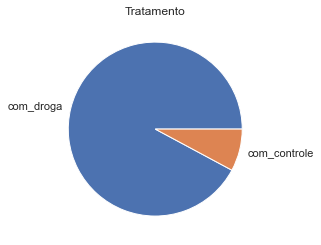

In [ ]:
dados_experimentos['tratamento'].value_counts(normalize = True).plot.pie()
plt.ylabel('')
plt.title('Tratamento', fontsize= 12)
plt.show()

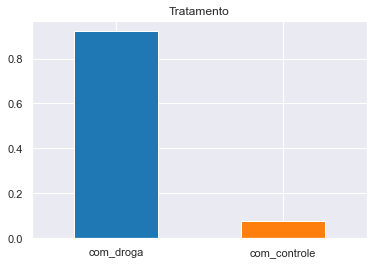

In [ ]:
dados_experimentos['tratamento'].value_counts(normalize = True).plot.bar(color=['tab:blue','tab:orange'])
plt.title('Tratamento', fontsize= 12)
plt.xticks(rotation=0)
plt.show()

In [ ]:
dados_experimentos['tempo'].value_counts(normalize = True) *100

48    34.643487
72    32.720249
24    32.636264
Name: tempo, dtype: float64

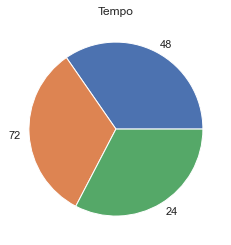

In [ ]:
dados_experimentos['tempo'].value_counts(normalize = True).plot.pie()
plt.ylabel('')
plt.title('Tempo', fontsize= 12)
plt.show()

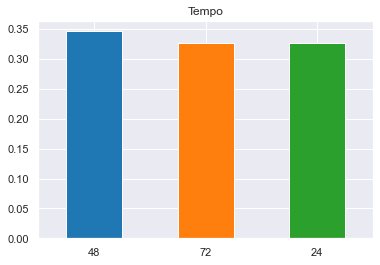

In [ ]:
dados_experimentos['tempo'].value_counts(normalize = True).plot.bar(color=['tab:blue','tab:orange', 'tab:green'])
plt.title('Tempo', fontsize= 12)
plt.xticks(rotation=0)
plt.show()

In [ ]:
dados_experimentos['dose'].value_counts(normalize = True) *100

D1    51.007811
D2    48.992189
Name: dose, dtype: float64

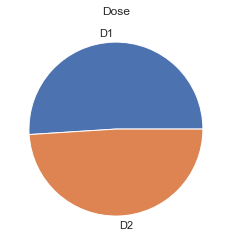

In [ ]:
dados_experimentos['dose'].value_counts(normalize = True).plot.pie()
plt.ylabel('')
plt.title('Dose', fontsize= 12)
plt.show()

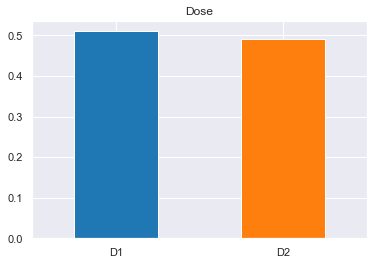

In [ ]:
dados_experimentos['dose'].value_counts(normalize = True).plot.bar(color=['tab:blue','tab:orange'])
plt.title('Dose', fontsize= 12)
plt.xticks(rotation=0)
plt.show()

Nesse ponto temos a questão mais obvia que se levanta é porque o grupo tratamento é tão desbalanceado. Vejamos primeiramente quantos são os compostos no grupo controle.

In [ ]:
dados_experimentos.query('tratamento == "com_controle"')['composto'].unique()

array(['cacb2b860'], dtype=object)

In [ ]:
dados_experimentos['composto'].value_counts()[:10]

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
67c879e79      19
Name: composto, dtype: int64

In [ ]:
dados_experimentos.query('tratamento == "com_droga" & composto == "cacb2b860"')

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99


A melhor explicação que descobrimos é que um estudo precisa de um grupo controle igual ou maior que seu grupo com droga. Como o grupo controle pode ser maior que o grupo com droga e nesse caso o grupo controle é maior que qualquer grupo com um composto específico, podemos deduzir é que o grupo controle nesse estudo serve para qualquer droga. Portanto, ele nos parece adequado. 

Vamos verificar agora quantos compostos diferentes existem nessa pesquisa e se algum composto não cumpre todas as variações analíticas.

In [ ]:
dados_experimentos['composto'].nunique()-1

3288

In [ ]:
composto_por_dose = dados_experimentos.groupby('composto')['dose'].value_counts().unstack()
composto_por_dose

dose,D1,D2
composto,,
00199ff52,3.0,3.0
00251fc41,3.0,3.0
00321ea80,6.0,6.0
0034c0847,3.0,3.0
0060e686f,3.0,3.0
...,...,...
ff9565933,3.0,3.0
ffd66e220,3.0,3.0
ffe357f8f,1.0,NaN


In [ ]:
composto_por_dose[composto_por_dose['D1'].isnull()]

dose,D1,D2
composto,,


In [ ]:
composto_por_dose[composto_por_dose['D2'].isnull()]

dose,D1,D2
composto,,
00dba5599,1.0,NaN
06787fefe,1.0,NaN
07cca32e8,1.0,NaN
0dedfb162,1.0,NaN
0e6ee26ff,1.0,NaN
...,...,...
f5c443039,1.0,NaN
fb69fd749,1.0,NaN
fb8a93a83,1.0,NaN


Com isso verificamos que existem 133 compostos que foram aplicados somente a dose 1. Posteriormente verificaremos quais os mecanismos de ação relacionados a esses compostos para verificar se há um motivos para essa não variação de dose.

In [ ]:
composto_por_tempo = dados_experimentos.groupby('composto')['tempo'].value_counts().unstack()
composto_por_tempo

tempo,24,48,72
composto,,,
00199ff52,2.0,2.0,2.0
00251fc41,2.0,2.0,2.0
00321ea80,4.0,4.0,4.0
0034c0847,2.0,2.0,2.0
0060e686f,2.0,2.0,2.0
...,...,...,...
ff9565933,2.0,2.0,2.0
ffd66e220,2.0,2.0,2.0
ffe357f8f,NaN,1.0,NaN


In [ ]:
composto_por_tempo[composto_por_tempo[24].isnull()]

tempo,24,48,72
composto,,,
00dba5599,NaN,1.0,NaN
06787fefe,NaN,1.0,NaN
07cca32e8,NaN,1.0,NaN
0dedfb162,NaN,1.0,NaN
0e6ee26ff,NaN,1.0,NaN
...,...,...,...
f5c443039,NaN,1.0,NaN
fb69fd749,NaN,1.0,NaN
fb8a93a83,NaN,1.0,NaN


In [ ]:
composto_por_tempo[composto_por_tempo[48].isnull()]

tempo,24,48,72
composto,,,


In [ ]:
composto_por_tempo[composto_por_tempo[72].isnull()]

tempo,24,48,72
composto,,,
00dba5599,NaN,1.0,NaN
06787fefe,NaN,1.0,NaN
07cca32e8,NaN,1.0,NaN
0dedfb162,NaN,1.0,NaN
0e6ee26ff,NaN,1.0,NaN
...,...,...,...
f5c443039,NaN,1.0,NaN
fb69fd749,NaN,1.0,NaN
fb8a93a83,NaN,1.0,NaN


In [ ]:
compostos_24 = dados_experimentos[dados_experimentos['tempo'] == 24]['composto']

In [ ]:
compostos_72 = dados_experimentos[dados_experimentos['tempo'] == 72]['composto']

In [ ]:
dados_experimentos.query('composto in @compostos_24 & composto not in @compostos_72')

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99


In [ ]:
dados_experimentos.query('composto in @compostos_72 & composto not in @compostos_24')

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99


Verificamos que existem 132 experimentos que só possuem a variação de 48 horas, inclusive é curioso que esse número é quase o mesmo do número de experimento com somente uma dose. Serão os mesmo compostos? Além disso constatamos também que os compostos dos experimentos de 24 e 72 horas são os mesmos.

In [ ]:
compostos_48 = composto_por_tempo[composto_por_tempo[24].isnull()].index

In [ ]:
dados_experimentos.query('composto in @compostos_48 & dose == "D2"')

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99


In [ ]:
compostos_D1 = composto_por_dose[composto_por_dose['D2'].isnull()].index

In [ ]:
dados_experimentos.query('composto in @compostos_48 & composto not in @compostos_D1')

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99


In [ ]:
dados_experimentos.query('composto not in @compostos_48 & composto in @compostos_D1')

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
2533,id_1b068fce1,com_droga,24,D1,42c4f2a5a,2.037,0.0108,0.6634,0.0317,-0.4527,...,-3.217,-6.184,-6.464,-9.348,-8.754,-2.126,-4.598,-4.125,0.5852,-2.444
14733,id_9e5bc8a08,com_droga,48,D1,42c4f2a5a,3.936,1.0310,1.3320,0.9992,-1.0440,...,-3.082,-4.895,-8.427,-10.000,-10.000,-2.253,-5.413,-5.232,-2.8290,-5.911
16588,id_b24a38bca,com_droga,72,D1,42c4f2a5a,4.101,1.0770,0.7417,1.1480,1.3420,...,-8.752,-9.797,-9.671,-10.000,-10.000,-5.786,-10.000,-8.149,-5.0820,-7.644


Verificamos que realmente a lista de compostos que só foram aplicado com a dose 1 e compostos que foram aplicados somente no tempo de 48 horas. Sendo a únicao excessão o composto 42c4f2a5a que foi aplicado somente a dose 1 mas foi verificado em todos os tempos.

Verifiquemos agora as diferenças entre os tempos.

In [ ]:
dados_experimentos.query('composto in @compostos_24 & tempo == 72 & dose == "D1" & tratamento == "com_droga"')

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
14,id_002d31e2c,com_droga,72,D1,e0cd5c091,0.4242,1.7040,-1.3230,-0.3163,-0.4642,...,-5.9590,-0.6440,-0.3461,-4.9490,-1.1380,-5.2000,-8.1330,-4.3170,-6.2390,0.9477
22,id_003d4b6f0,com_droga,72,D1,b67df960c,0.6111,-0.2907,-0.7853,0.1947,-0.9804,...,0.0947,0.5732,0.0289,0.1109,0.1208,0.5104,0.7287,-0.0168,-0.3555,-0.0509
23,id_003fdd734,com_droga,72,D1,f4e4006d9,-0.0185,0.3547,-0.3312,0.4509,-0.7054,...,-0.1064,-0.3010,-0.5528,-0.0812,1.1190,0.1807,0.7360,-0.0035,-0.2095,1.0070
26,id_00548fd5c,com_droga,72,D1,c4e054ded,-0.2740,-0.9351,-0.7293,-0.1066,-0.2957,...,-0.2628,0.9624,-0.1850,0.0656,0.3855,0.8191,0.3449,0.7975,0.6742,0.1887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23763,id_ff7b158fa,com_droga,72,D1,979f3480e,-0.4043,0.4844,0.3569,0.1096,0.2704,...,-0.1533,0.3737,0.2784,0.6957,-0.6140,-0.0436,-0.2216,0.4816,0.1910,0.2381
23767,id_ff808ce8b,com_droga,72,D1,a24a0384e,-0.7332,0.4657,0.6855,-0.4933,-0.1184,...,0.2424,0.1746,0.9645,0.3381,-0.2530,0.8049,0.7328,0.6281,0.3268,-0.6414
23773,id_ff9408674,com_droga,72,D1,7e5ccc730,-0.2370,0.6065,0.0149,-0.1261,-1.3610,...,-0.5297,-0.4623,-0.1476,0.0108,-0.6002,0.1919,-0.5024,0.3165,-0.7109,0.5308
23808,id_fff8c2444,com_droga,72,D1,6c3a459be,0.1608,-1.0500,0.2551,-0.2239,-0.2431,...,0.0789,0.3538,0.0558,0.3377,-0.4753,-0.2504,-0.7415,0.8413,-0.4259,0.2434


In [ ]:
dados_experimentos.query('composto in @compostos_24 & tempo == 72 & dose == "D2" & tratamento == "com_droga"')

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
10,id_002452c7e,com_droga,72,D2,89dea2045,-0.2875,0.0322,-0.8863,-0.0016,-0.7471,...,0.2050,-0.7286,0.4684,-0.1541,0.8135,1.4680,0.6648,0.0651,-0.0125,0.2600
18,id_003603254,com_droga,72,D2,3cda750b5,-0.4694,-1.5180,-2.0430,0.5750,0.5077,...,-1.4650,-0.3515,-0.3931,-0.5623,-1.0300,-1.3360,-1.3790,-0.4393,-0.0259,0.9765
24,id_00505b3c8,com_droga,72,D2,06008aff2,0.4442,0.1313,-0.4171,1.2860,-0.5766,...,-0.1442,0.1209,-0.2205,0.6333,0.2286,0.9305,-0.9049,-0.6155,0.3978,0.4596
46,id_008a18cef,com_droga,72,D2,b66b0e2f9,0.6492,0.5022,1.0700,-0.3310,0.3905,...,-0.2043,-0.8350,0.1896,0.1787,-0.6268,-0.2938,0.0717,0.3980,-0.8641,1.1270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23791,id_ffd1fd119,com_droga,72,D2,87d714366,5.3120,0.4505,1.5320,0.8226,3.0250,...,-9.9660,-9.9660,-9.2200,-9.3730,-9.9660,-9.3620,-9.9660,-8.6420,-9.9660,-4.6050
23795,id_ffdd24c81,com_droga,72,D2,e234cbb34,-1.1810,-0.5206,0.0939,0.2877,-0.8058,...,-0.2464,-0.6604,-0.0723,0.6411,-1.2220,-0.2601,-1.3750,-0.1953,0.1330,-0.2419
23797,id_ffe6452ba,com_droga,72,D2,a993c9d8e,-0.6087,-0.4014,-2.6870,-0.7211,0.0211,...,0.1262,0.4257,0.4404,-0.0210,-0.0737,0.4071,-0.1795,0.0287,0.8309,1.1490
23798,id_fff11dbf5,com_droga,72,D2,95fa83810,-0.5946,0.1265,-2.1300,0.5877,-0.0638,...,0.6436,0.4071,0.4773,-0.2062,1.0460,0.0088,-0.4231,-0.1848,0.5300,-0.1913


Aqui já localizamos a diferença entre experimentos entre os tempos de 24 e 72 horas. Sabemos que os compostos são os mesmo, o que nos leva a crês que existem experimentos diferentes com as mesmas configurações de tratamento, tempo e dose. Vamos conferir.

In [ ]:
dados_experimentos.drop(columns='id').drop_duplicates()

,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


Curiosamente os experimentos com mesmas configurações geram resultados de expressão gênica e viabilidade celular diferentes. O que faz sentido, afinal é provável que os experimentos foram feitos com pessoas diferentes ou em momentos diferentes. Vamos verificar no composto mais frequente se isso acontece.

In [ ]:
dados_experimentos.composto.value_counts()[1:2]

87d714366    718
Name: composto, dtype: int64

In [ ]:
dados_experimentos.query('composto == "87d714366" & tempo == 24 & dose == "D1"')

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
359,id_03dd91d6c,com_droga,24,D1,87d714366,3.864,1.1390,0.8857,1.8610,0.5814,...,-9.682,-8.465,-8.265,-10.000,-7.994,-2.828,-8.393,-6.245,-4.745,-3.879
1153,id_0bdd03e2b,com_droga,24,D1,87d714366,1.070,1.0780,0.0793,3.5590,0.7921,...,-6.513,-4.978,-6.328,-8.601,-5.218,-1.249,-6.775,-4.531,-3.794,-2.418
2034,id_15ea33a01,com_droga,24,D1,87d714366,1.534,1.3830,-0.2677,2.4610,0.3419,...,-9.052,-6.969,-8.925,-10.000,-9.351,-3.139,-8.516,-6.387,-5.475,-3.148
2564,id_1b42fe069,com_droga,24,D1,87d714366,5.272,1.5220,1.6430,1.6800,1.7050,...,-9.399,-8.046,-8.811,-9.313,-8.382,-4.071,-9.935,-4.803,-6.132,-4.688
2836,id_1e7e455d1,com_droga,24,D1,87d714366,4.388,0.8559,1.4530,1.6450,2.4720,...,-8.487,-7.051,-7.464,-10.000,-7.464,-1.752,-9.865,-7.817,-5.090,-3.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,id_f95429e74,com_droga,24,D1,87d714366,4.677,0.3408,0.2318,0.7679,2.6420,...,-7.704,-7.942,-8.509,-10.000,-7.026,-2.215,-6.284,-6.420,-4.395,-2.987
23298,id_fa5cf421e,com_droga,24,D1,87d714366,4.777,0.9705,0.2897,0.8863,2.2380,...,-9.687,-6.890,-9.132,-9.986,-8.161,-2.261,-9.296,-5.737,-5.024,-4.421
23386,id_fb57829c1,com_droga,24,D1,87d714366,1.772,0.8781,-0.0984,3.7290,0.4621,...,-6.989,-6.034,-5.799,-8.629,-6.783,-1.277,-7.015,-3.712,-3.509,-1.965
23433,id_fbdc2d91a,com_droga,24,D1,87d714366,3.032,1.0770,0.8468,1.6080,0.9535,...,-8.261,-7.394,-8.914,-10.000,-9.986,-3.539,-7.511,-4.983,-5.403,-3.242


Vejamos agora como está a distribuição dos compostos.

In [ ]:
dados_experimentos.composto.value_counts()[1:10]

87d714366    718
9f80f3f77    246
8b87a7a83    203
5628cb3ee    202
d08af5d4b    196
292ab2c28    194
d50f18348    186
d1b47f29d    178
67c879e79     19
Name: composto, dtype: int64

In [ ]:
compostos_maior_freq = dados_experimentos.composto.value_counts()[1:9].index

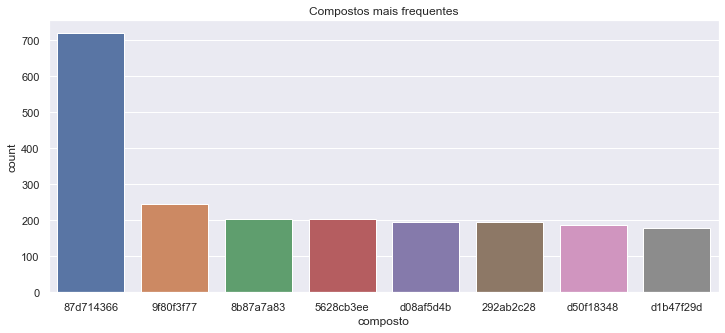

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='composto', data=dados_experimentos.query('composto in @compostos_maior_freq'), 
              order=compostos_maior_freq)
plt.title('Compostos mais frequentes', fontsize= 12)
plt.show()

Primeiramente não colocamos o composto de controle e selecionamos os compostos mais relevantes, no caso com mais de 100 experimentos. Disso podemos notar que o composto 87d714366 se destaca por ser muito mais frequente que o restante e que os outros são relativamente iguais. Cabe então analisar esse composto específico e a relação entre si dos outros composto nos resultados.

Antes de sequir para os resultados vamos analisar as colunas numéricas, ou seja, os g'x' e os c'x'. Como são muitas as colunas vamos gerar números aleatórios para selecionar algumas colunas.

In [ ]:
dados_experimentos.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'composto', 'g0', 'g1', 'g2', 'g3',
       'g4',
       ...
       'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99'],
      dtype='object', length=877)

In [ ]:
dados_experimentos.columns[-101]

'g771'

In [ ]:
import random
from random import randint
seed = 1

In [ ]:
lista_rand_g = []
random.seed(seed)
for i in range(9):
    n = str(randint(0,771))
    gn = ''.join(('g',n))
    lista_rand_g.append(gn)

In [ ]:
dados_experimentos[lista_rand_g].nunique()

g137    14325
g582    14222
g64     13790
g261    13638
g120    14125
g507    13384
g460    13482
g483    14009
g667    10557
dtype: int64

In [ ]:
lista_rand_c = []
random.seed(seed)
for i in range(9):
    n = str(randint(0,99))
    cn = ''.join(('c',n))
    lista_rand_c.append(cn)

In [ ]:
dados_experimentos[lista_rand_c].nunique()

c17    14457
c72    14435
c97    14757
c8     14667
c32    14550
c15    14639
c63    14608
c97    14757
c57    14893
dtype: int64

Verificamos que os valores, tanto das expressões gênicas quanto das viabilidades celulares, variam muito. Melhor então procurar padrões nessas colunas com o boxplot, 

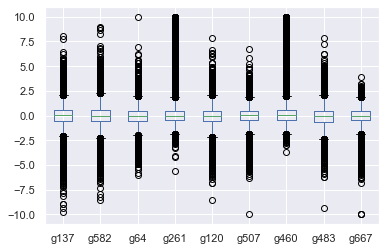

In [ ]:
dados_experimentos[lista_rand_g].plot.box()
plt.show()

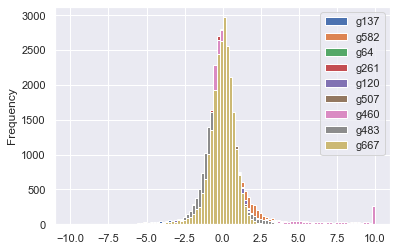

In [ ]:
dados_experimentos[lista_rand_g].plot.hist(bins=100)
plt.show()

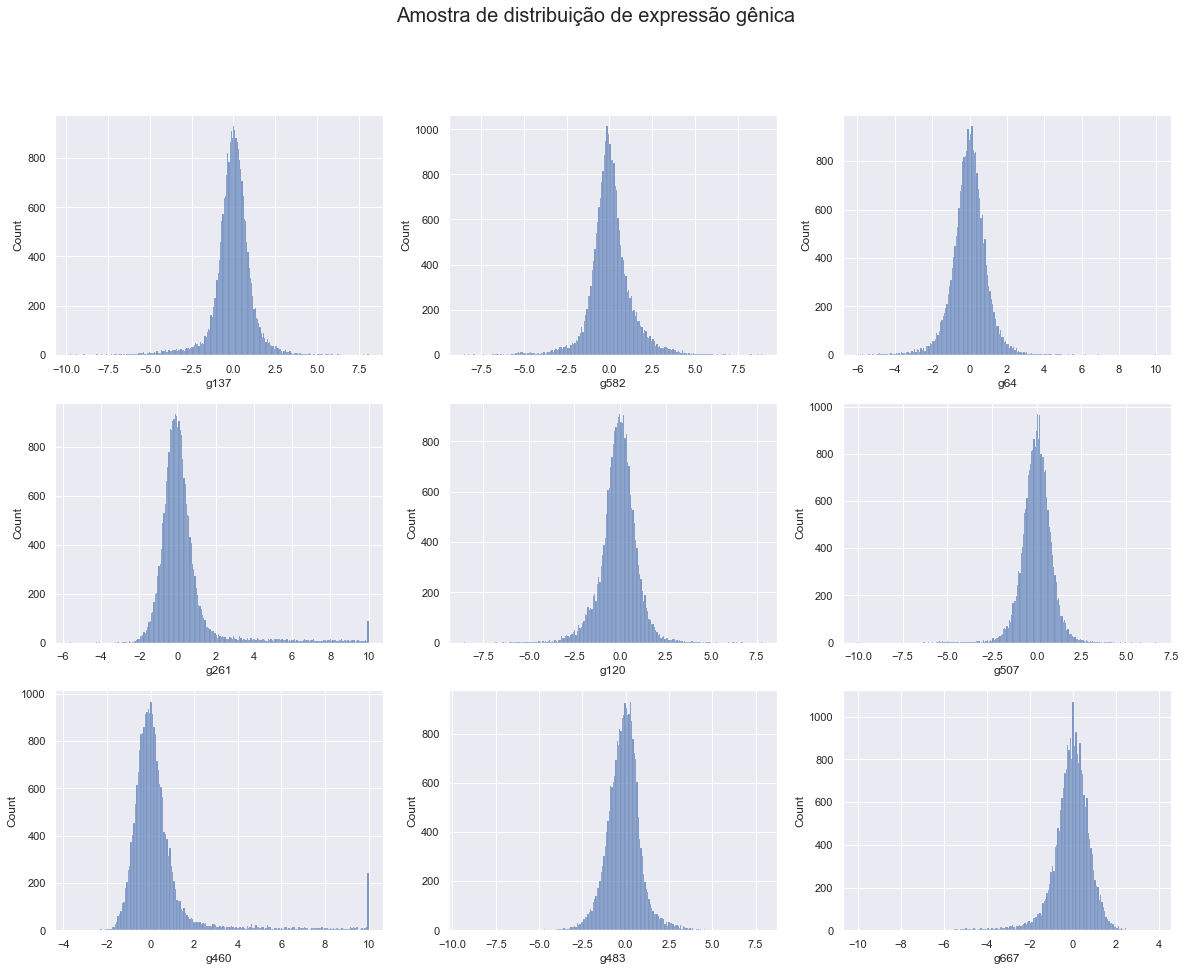

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(20,15))
sns.histplot(dados_experimentos[lista_rand_g[0]], ax=ax[0,0])
sns.histplot(dados_experimentos[lista_rand_g[1]], ax=ax[0,1])
sns.histplot(dados_experimentos[lista_rand_g[2]], ax=ax[0,2])
sns.histplot(dados_experimentos[lista_rand_g[3]], ax=ax[1,0])
sns.histplot(dados_experimentos[lista_rand_g[4]], ax=ax[1,1])
sns.histplot(dados_experimentos[lista_rand_g[5]], ax=ax[1,2])
sns.histplot(dados_experimentos[lista_rand_g[6]], ax=ax[2,0])
sns.histplot(dados_experimentos[lista_rand_g[7]], ax=ax[2,1])
sns.histplot(dados_experimentos[lista_rand_g[8]], ax=ax[2,2])
plt.suptitle('Amostra de distribuição de expressão gênica', fontsize=20)
plt.show()

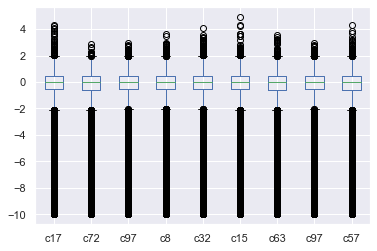

In [ ]:
dados_experimentos[lista_rand_c].plot.box()
plt.show()

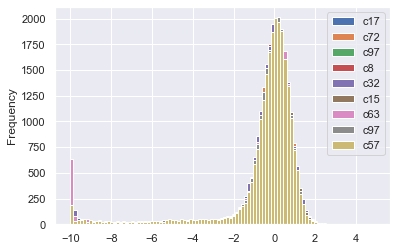

In [ ]:
dados_experimentos[lista_rand_c].plot.hist(bins=100)
plt.show()

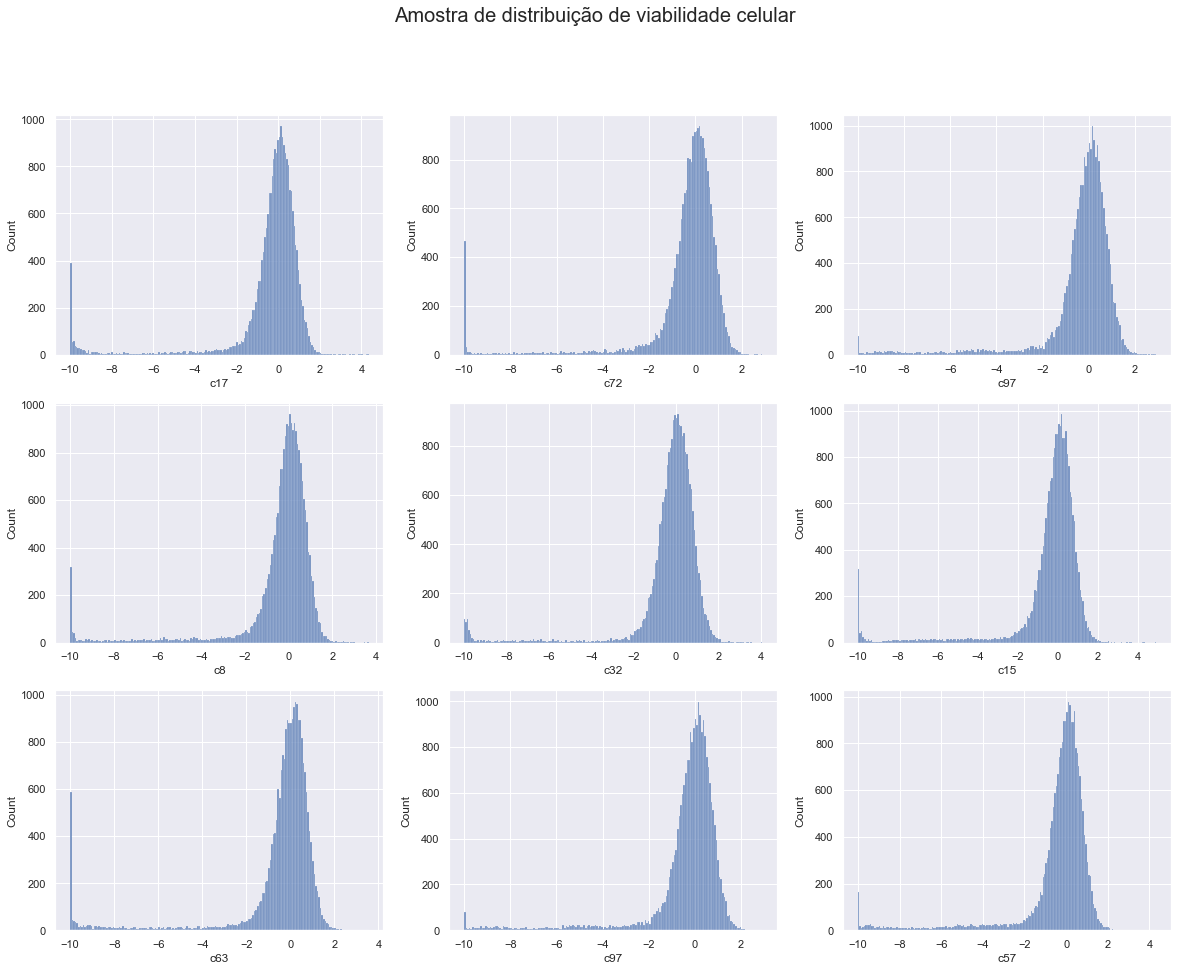

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(20,15))
sns.histplot(dados_experimentos[lista_rand_c[0]], ax=ax[0,0])
sns.histplot(dados_experimentos[lista_rand_c[1]], ax=ax[0,1])
sns.histplot(dados_experimentos[lista_rand_c[2]], ax=ax[0,2])
sns.histplot(dados_experimentos[lista_rand_c[3]], ax=ax[1,0])
sns.histplot(dados_experimentos[lista_rand_c[4]], ax=ax[1,1])
sns.histplot(dados_experimentos[lista_rand_c[5]], ax=ax[1,2])
sns.histplot(dados_experimentos[lista_rand_c[6]], ax=ax[2,0])
sns.histplot(dados_experimentos[lista_rand_c[7]], ax=ax[2,1])
sns.histplot(dados_experimentos[lista_rand_c[8]], ax=ax[2,2])
plt.suptitle('Amostra de distribuição de viabilidade celular', fontsize=20)
plt.show()

Através dos gráficos boxplot e histograma descobrimos que tanto as expressões gênicas quantos as viabilidade celulares foram normalizadas. Assim sendo todas tem a mediana no 0 e, de forma geral, a distribuição de cada g ou c segue uma distribuição normal. Visto que todas as amostras de viabildiade celular tiveram um desvio para a esquerda, cabe verificar se esse desvio se deu nos mais diversos compostos ou em um grupo específico de compostos.

In [ ]:
dados_experimentos[dados_experimentos['c0'] < -2]

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
14,id_002d31e2c,com_droga,72,D1,e0cd5c091,0.4242,1.7040,-1.3230,-0.3163,-0.4642,...,-5.959,-0.6440,-0.3461,-4.9490,-1.1380,-5.200,-8.1330,-4.3170,-6.2390,0.9477
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,...,-9.984,-9.9840,-9.9840,-9.9840,-9.9840,-9.984,-9.9840,-9.9840,-9.9840,-6.7840
65,id_00a4acf2d,com_droga,48,D2,6def270ae,0.1528,0.2480,1.4160,0.8525,0.7965,...,-2.376,-0.7508,-2.5860,-7.0780,-2.7570,-0.568,-1.6830,-1.7590,-6.8320,-4.0660
76,id_00cf039a7,com_droga,48,D2,87d714366,4.5460,0.4257,0.7670,2.1950,2.5960,...,-8.729,-10.0000,-7.8340,-9.5380,-10.0000,-8.520,-10.0000,-7.4360,-6.9180,-5.2350
119,id_01534c4ee,com_droga,72,D2,87d714366,10.0000,-1.2200,1.5150,-2.1910,4.3530,...,-10.000,-10.0000,-7.7030,-10.0000,-10.0000,-9.054,-10.0000,-8.7710,-9.6940,-5.5480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23776,id_ff9d0a022,com_droga,24,D2,87d714366,1.2270,0.3781,2.8860,7.1470,-0.4875,...,-10.000,-9.3280,-7.3800,-10.0000,-8.7540,-1.938,-7.5290,-6.3180,-5.7010,-3.5610
23789,id_ffce0f145,com_droga,24,D2,e639c2fc8,-0.2906,0.9036,0.9434,0.6339,0.1033,...,0.191,0.4724,-0.3245,0.5941,0.3185,-2.486,-0.4974,0.2859,0.2637,0.3249
23791,id_ffd1fd119,com_droga,72,D2,87d714366,5.3120,0.4505,1.5320,0.8226,3.0250,...,-9.966,-9.9660,-9.2200,-9.3730,-9.9660,-9.362,-9.9660,-8.6420,-9.9660,-4.6050
23802,id_fff3976bd,com_droga,24,D1,87d714366,3.2890,2.1270,0.9770,2.0490,2.3170,...,-8.630,-8.1490,-6.2900,-8.0970,-8.7330,-2.378,-8.4480,-4.4550,-5.7930,-3.7000


<AxesSubplot:>

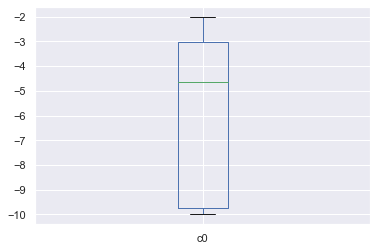

In [ ]:
dados_experimentos[dados_experimentos['c0'] < -2]['c0'].plot.box()

In [ ]:
baixa_viab_cel = dados_experimentos[dados_experimentos['c0'] < -2]['composto'].value_counts()
baixa_viab_cel

87d714366    712
292ab2c28     75
d1b47f29d     57
d08af5d4b     36
52d1e6f43     14
            ... 
0f7cd09d2      1
b266bfb86      1
169fb7b56      1
601b091c0      1
4501c0f05      1
Name: composto, Length: 284, dtype: int64

Aqui temo algo interessante, o composto cacb2b860, que é o controle dos experimentos, aparece em sexto lugar nos que mais geraram baixa viabilidade celular, portando ele pode servir de marco estatístico para dizer se a baixa é meramente probabilistica ou não. Vejamos qual é essa probabilidade e quais compostos destoam dela. Porem, antes disso vamos ver se existe correlação entre os compostos e para tentar selecionar as viabilidades celulares mais representativas do conjunto. Vamos aproveitar e fazer o mesmo para as expressões gênicas.

In [ ]:
correlacao_cc = dados_experimentos.query('tratamento == "com_droga"').loc[:,'c0':'c99'].corr()

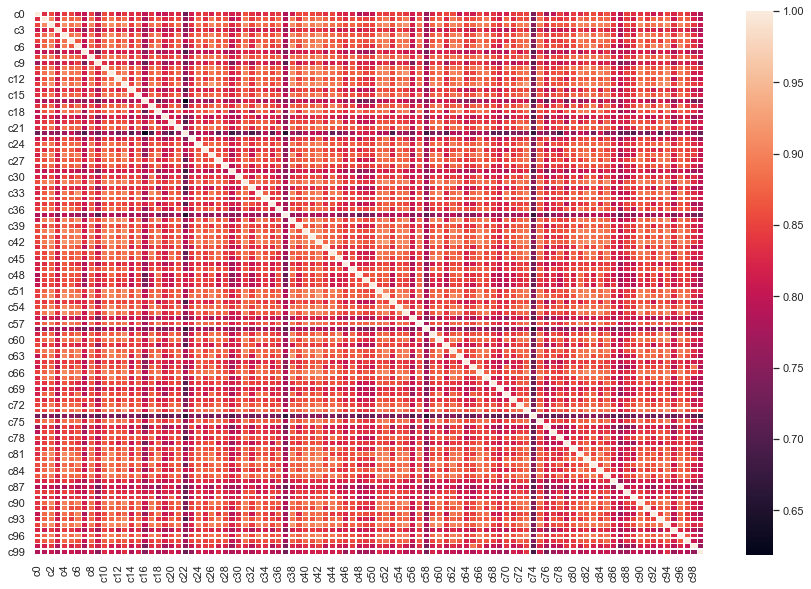

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(correlacao_cc, linewidths=.5)
plt.show()

In [ ]:
correlacao_gg = dados_experimentos.query('tratamento == "com_droga"').loc[:,'g0':'g99'].corr()

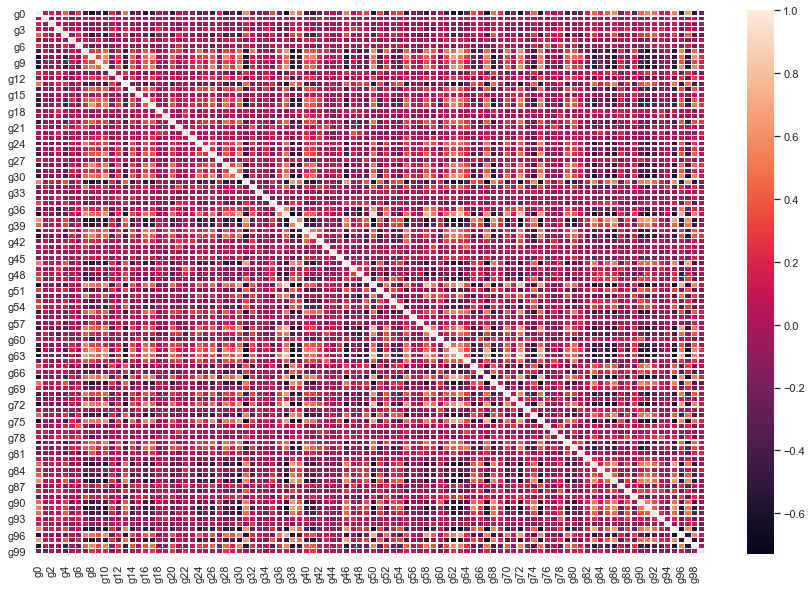

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(correlacao_gg, linewidths=.5)
plt.show()

Podemos notar que o comportamento do grupo c é bem mais homogeneo que o do grupo g. Sendo assim me parece razoável selecionar o elemento da viabilidade celular com maior média de correlação. Em relação ao grupo g, vamos selecionar pelo menos 3 elementos, o de maior correlação média e o de menor correlação média.

In [ ]:
correlacao_cc.mean().sort_values(ascending=False)

c42    0.880520
c2     0.873217
c13    0.872616
c52    0.872195
c94    0.871302
         ...   
c16    0.784444
c58    0.769804
c37    0.768751
c22    0.753027
c74    0.733037
Length: 100, dtype: float64

In [ ]:
correlacao_gg.mean().sort_values(ascending=False)

g63    0.072428
g50    0.071174
g37    0.068685
g72    0.067727
g7     0.063819
         ...   
g0    -0.047890
g86   -0.048204
g95   -0.049136
g91   -0.053529
g38   -0.057374
Length: 100, dtype: float64

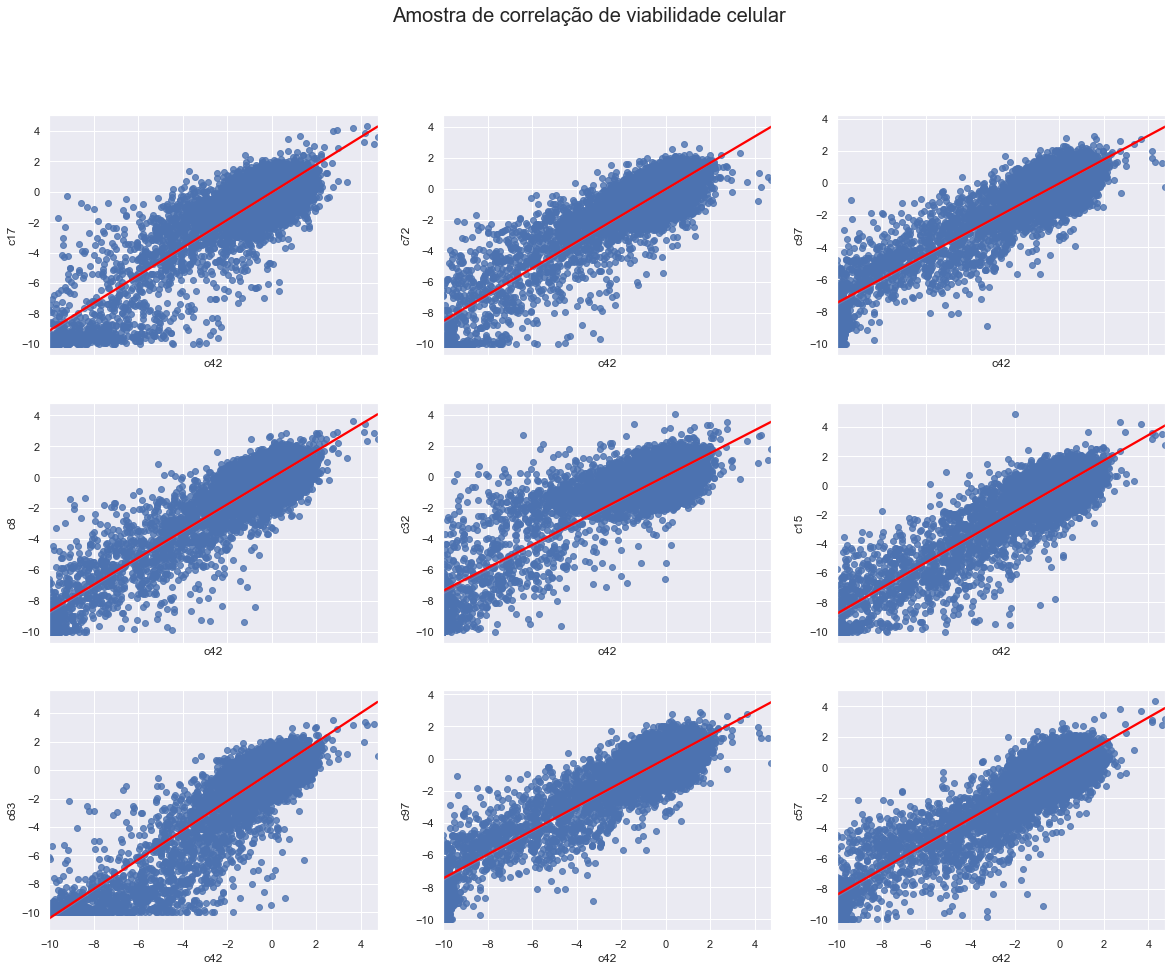

In [ ]:
fig, ax = plt.subplots(3,3, sharex=True, figsize=(20,15))
sns.regplot(data = dados_experimentos, x='c42',  y=lista_rand_c[0], line_kws={'color': 'red'}, ax=ax[0,0])
sns.regplot(data = dados_experimentos, x='c42',  y=lista_rand_c[1], line_kws={'color': 'red'}, ax=ax[0,1])
sns.regplot(data = dados_experimentos, x='c42',  y=lista_rand_c[2], line_kws={'color': 'red'}, ax=ax[0,2])
sns.regplot(data = dados_experimentos, x='c42',  y=lista_rand_c[3], line_kws={'color': 'red'}, ax=ax[1,0])
sns.regplot(data = dados_experimentos, x='c42',  y=lista_rand_c[4], line_kws={'color': 'red'}, ax=ax[1,1])
sns.regplot(data = dados_experimentos, x='c42',  y=lista_rand_c[5], line_kws={'color': 'red'}, ax=ax[1,2])
sns.regplot(data = dados_experimentos, x='c42',  y=lista_rand_c[6], line_kws={'color': 'red'}, ax=ax[2,0])
sns.regplot(data = dados_experimentos, x='c42',  y=lista_rand_c[7], line_kws={'color': 'red'}, ax=ax[2,1])
sns.regplot(data = dados_experimentos, x='c42',  y=lista_rand_c[8], line_kws={'color': 'red'}, ax=ax[2,2])
plt.suptitle('Amostra de correlação de viabilidade celular', fontsize=20)
plt.show()

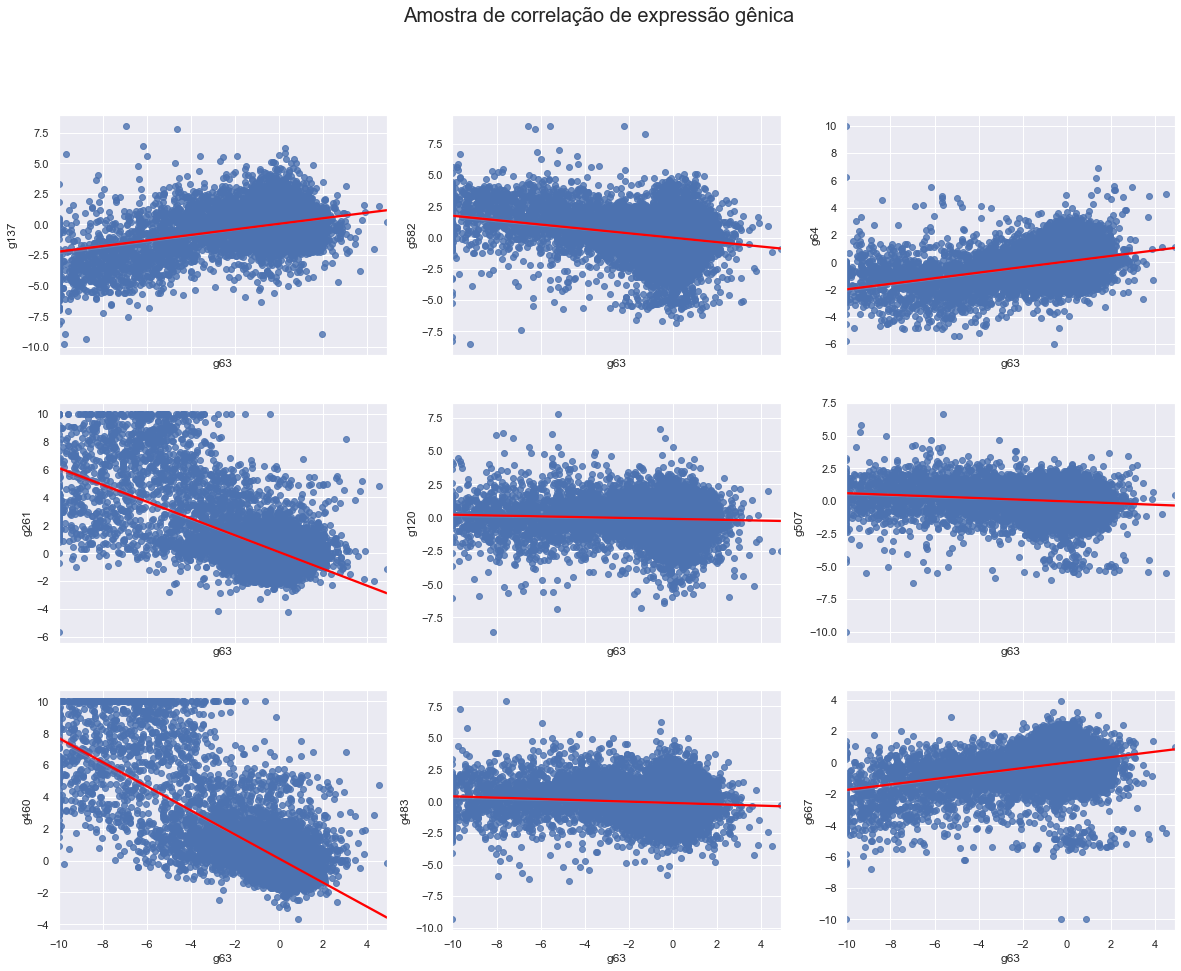

In [ ]:
fig, ax = plt.subplots(3,3, sharex=True, figsize=(20,15))
sns.regplot(data = dados_experimentos, x='g63',  y=lista_rand_g[0], line_kws={'color': 'red'}, ax=ax[0,0])
sns.regplot(data = dados_experimentos, x='g63',  y=lista_rand_g[1], line_kws={'color': 'red'}, ax=ax[0,1])
sns.regplot(data = dados_experimentos, x='g63',  y=lista_rand_g[2], line_kws={'color': 'red'}, ax=ax[0,2])
sns.regplot(data = dados_experimentos, x='g63',  y=lista_rand_g[3], line_kws={'color': 'red'}, ax=ax[1,0])
sns.regplot(data = dados_experimentos, x='g63',  y=lista_rand_g[4], line_kws={'color': 'red'}, ax=ax[1,1])
sns.regplot(data = dados_experimentos, x='g63',  y=lista_rand_g[5], line_kws={'color': 'red'}, ax=ax[1,2])
sns.regplot(data = dados_experimentos, x='g63',  y=lista_rand_g[6], line_kws={'color': 'red'}, ax=ax[2,0])
sns.regplot(data = dados_experimentos, x='g63',  y=lista_rand_g[7], line_kws={'color': 'red'}, ax=ax[2,1])
sns.regplot(data = dados_experimentos, x='g63',  y=lista_rand_g[8], line_kws={'color': 'red'}, ax=ax[2,2])
plt.suptitle('Amostra de correlação de expressão gênica', fontsize=20)
plt.show()

Os elementos selecionados foram o c42, que tem a maior média de correlação entre as viabilidades celulares e o elementos g63, que tem a maior correlação média entre as expressões gênicas. A correlação média entre o grupo g não é indicativa, mas pelo menos serve de critério para escolha de um elemento a ser testado. Vamos verificar agora a questão a baixa viabilidade celular indicada nos gráficos de barras.

In [ ]:
baixa_viab_cel = dados_experimentos[dados_experimentos['c42'] < -2]['composto'].value_counts()
baixa_viab_cel

87d714366    718
292ab2c28    181
d08af5d4b    123
d1b47f29d     23
cacb2b860     21
            ... 
9289a3800      1
2daa68a56      1
e53bd9396      1
fb1b9a664      1
209a68d23      1
Name: composto, Length: 355, dtype: int64

Vamos verificar agora o percentual de referencia conforme a frequencia de baixa do composto placebo.

In [ ]:
freq_cont = dados_experimentos['composto'].value_counts()[0]
freq_cont

1866

In [ ]:
freq_cont_baixa_cel = dados_experimentos[dados_experimentos['c42'] < -2]['composto'].value_counts()[4]

In [ ]:
perct_baixa_cel_normal = (freq_cont_baixa_cel / freq_cont)*100
perct_baixa_cel_normal

1.1254019292604502

In [ ]:
perc_baixa_cel = pd.Series()
for c in baixa_viab_cel.index:
    freq = dados_experimentos[dados_experimentos['composto'] == c].shape[0]
    perct_comp = (baixa_viab_cel[c] / freq) * 100
    x = pd.Series({c:perct_comp})
    if perct_comp > perct_baixa_cel_normal:
        perc_baixa_cel = perc_baixa_cel.append(x)

<ipython-input-80-b89ec979fd11>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  perc_baixa_cel = pd.Series()


In [ ]:
perc_baixa_cel

87d714366    100.000000
292ab2c28     93.298969
d08af5d4b     62.755102
d1b47f29d     12.921348
52d1e6f43     94.444444
                ...    
9289a3800     16.666667
2daa68a56     16.666667
e53bd9396     12.500000
fb1b9a664     16.666667
209a68d23    100.000000
Length: 354, dtype: float64

Interessante, todos os compostos com que apresentam valores menores que -2 na viabilidade celular tiveram um percentual de baixa celular maior que o placebo. Vamos então verificar quais são os mais relevantes.

C:\Users\Marcelo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='composto'>

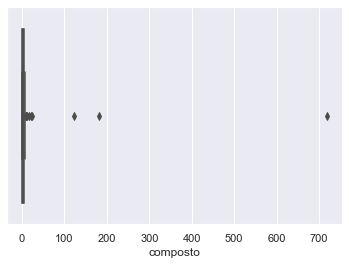

In [ ]:
sns.boxplot(baixa_viab_cel)

In [ ]:
comp_relev_baixa_viab_cel = baixa_viab_cel[0:3].index
comp_relev_baixa_viab_cel

Index(['87d714366', '292ab2c28', 'd08af5d4b'], dtype='object')

In [ ]:
perc_baixa_cel[comp_relev_baixa_viab_cel]

87d714366    100.000000
292ab2c28     93.298969
d08af5d4b     62.755102
dtype: float64

Ao que parece somente os composto com as 3 maiores frequencias são relevantes. Depois vamos observar se eles tem algo em comum nos resultados. Em seguida vamos observar as estatísticas descritivas das colunas numéricas e procurar mais padrões que possam indicar algum rumo.

In [ ]:
dados_experimentos.loc[:,'g0':'g771'].describe()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,...,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,...,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,...,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,...,-0.433875,-0.502250,-0.537075,-0.508775,-0.606175,-0.506200,-0.353100,-0.544600,-0.554400,-0.523800
50%,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,0.160450,...,0.059600,-0.005900,-0.013600,-0.027700,-0.011850,0.009900,0.005400,0.000600,0.028700,-0.006500
75%,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,0.697775,...,0.648500,0.492150,0.522500,0.457000,0.483000,0.511175,0.409075,0.498500,0.496400,0.536950
max,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,6.433000,...,10.000000,9.552000,10.000000,8.346000,5.444000,6.317000,10.000000,5.911000,10.000000,10.000000


<AxesSubplot:>

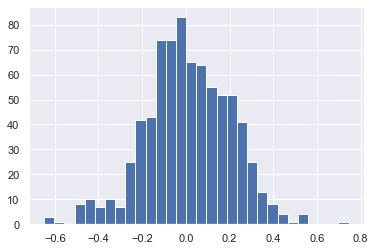

In [ ]:
dados_experimentos.loc[:,'g0':'g771'].describe().T['mean'].hist(bins=30)

<AxesSubplot:>

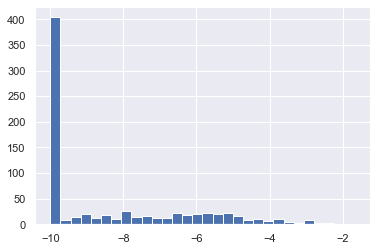

In [ ]:
dados_experimentos.loc[:,'g0':'g771'].describe().T['min'].hist(bins=30)

<AxesSubplot:>

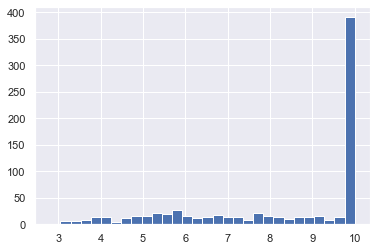

In [ ]:
dados_experimentos.loc[:,'g0':'g771'].describe().T['max'].hist(bins=30)

In [ ]:
dados_experimentos.loc[:,'c0':'c99'].describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,-0.355156,-0.455359,-0.480542,-0.377666,-0.493552,-0.446037,-0.574855,-0.266293,-0.451307,-0.458664,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,1.752565,2.004962,2.039346,1.554583,2.091888,1.893484,2.234152,1.465313,1.948829,1.646122,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,-0.549300,-0.538425,-0.550375,-0.601975,-0.559975,-0.578775,-0.571250,-0.524275,-0.551100,-0.654675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,-0.009000,0.009800,-0.004000,-0.039050,0.011400,-0.008900,0.007400,0.006350,-0.005350,-0.025350,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,0.448975,0.476875,0.460575,0.413100,0.470300,0.442675,0.459475,0.469375,0.453175,0.424400,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,3.365000,3.915000,2.970000,2.408000,4.555000,3.614000,3.904000,4.918000,3.648000,3.194000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


<AxesSubplot:>

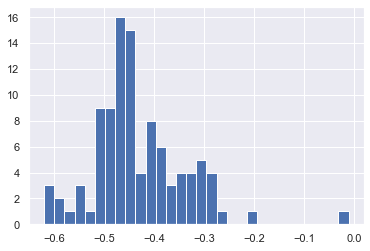

In [ ]:
dados_experimentos.loc[:,'c0':'c99'].describe().T['mean'].hist(bins=30)

<AxesSubplot:>

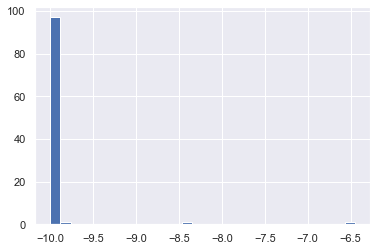

In [ ]:
dados_experimentos.loc[:,'c0':'c99'].describe().T['min'].hist(bins=30)

<AxesSubplot:>

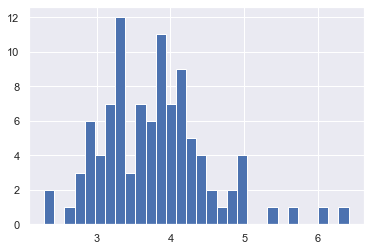

In [ ]:
dados_experimentos.loc[:,'c0':'c99'].describe().T['max'].hist(bins=30)

Novamente os elementos g não chamam a atenção e os elementos c chamam a atenção pelo mesmo motivo já investigado acima, uma tendencia para valores negativos. Vamos analisar agora a relação entre as variáveis categoricas e as numéricas.

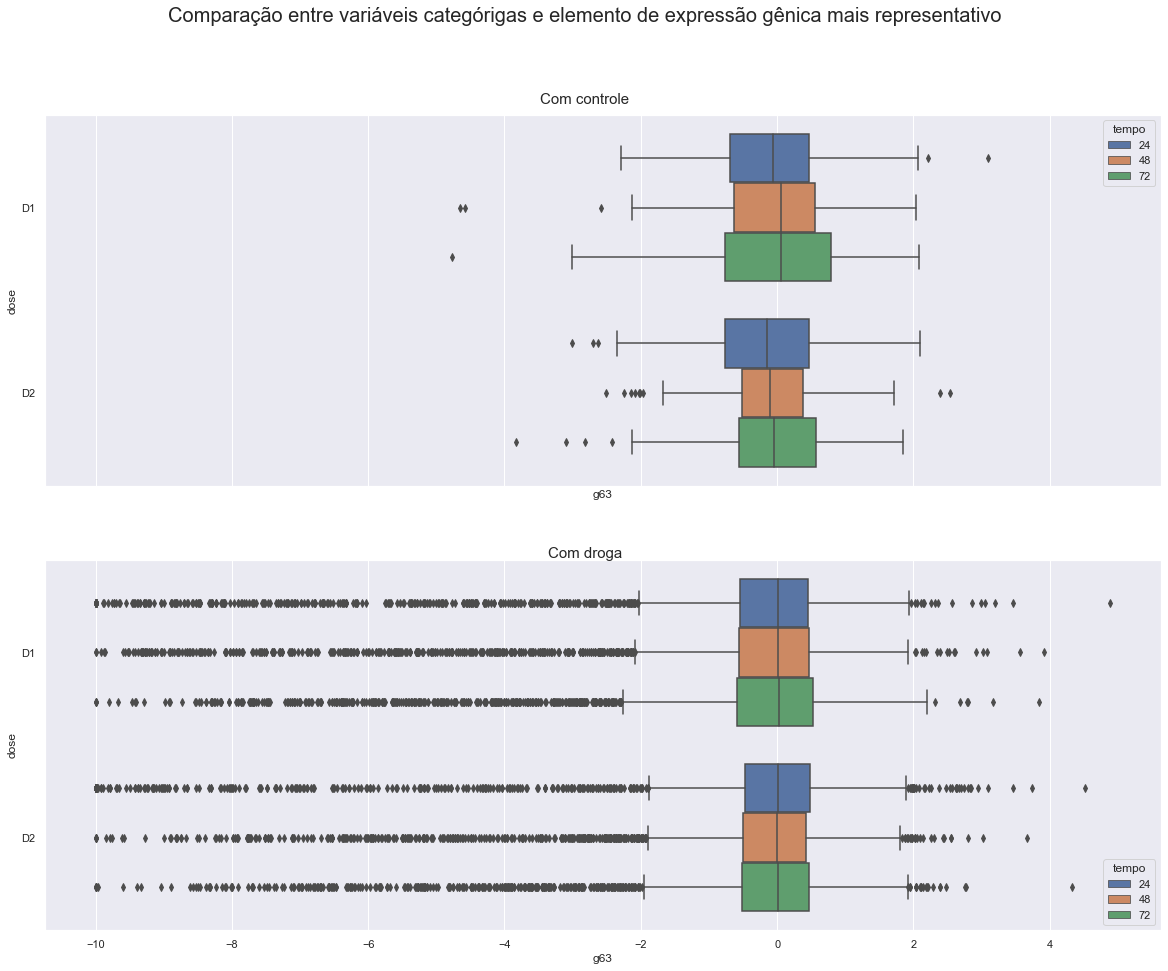

In [ ]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(20,15))
sns.boxplot(data=dados_experimentos.query('tratamento == "com_controle"'), y='dose', hue='tempo', x='g63', ax=ax[0])
sns.boxplot(data=dados_experimentos.query('tratamento == "com_droga"'), y='dose', hue='tempo', x='g63', ax=ax[1])
plt.suptitle('Comparação entre variáveis categórigas e elemento de expressão gênica mais representativo', fontsize=20)
plt.figtext(.5,.89,'Com controle', fontsize=15, ha='center')
plt.figtext(.5,.47,'Com droga', fontsize=15, ha='center')
plt.show()

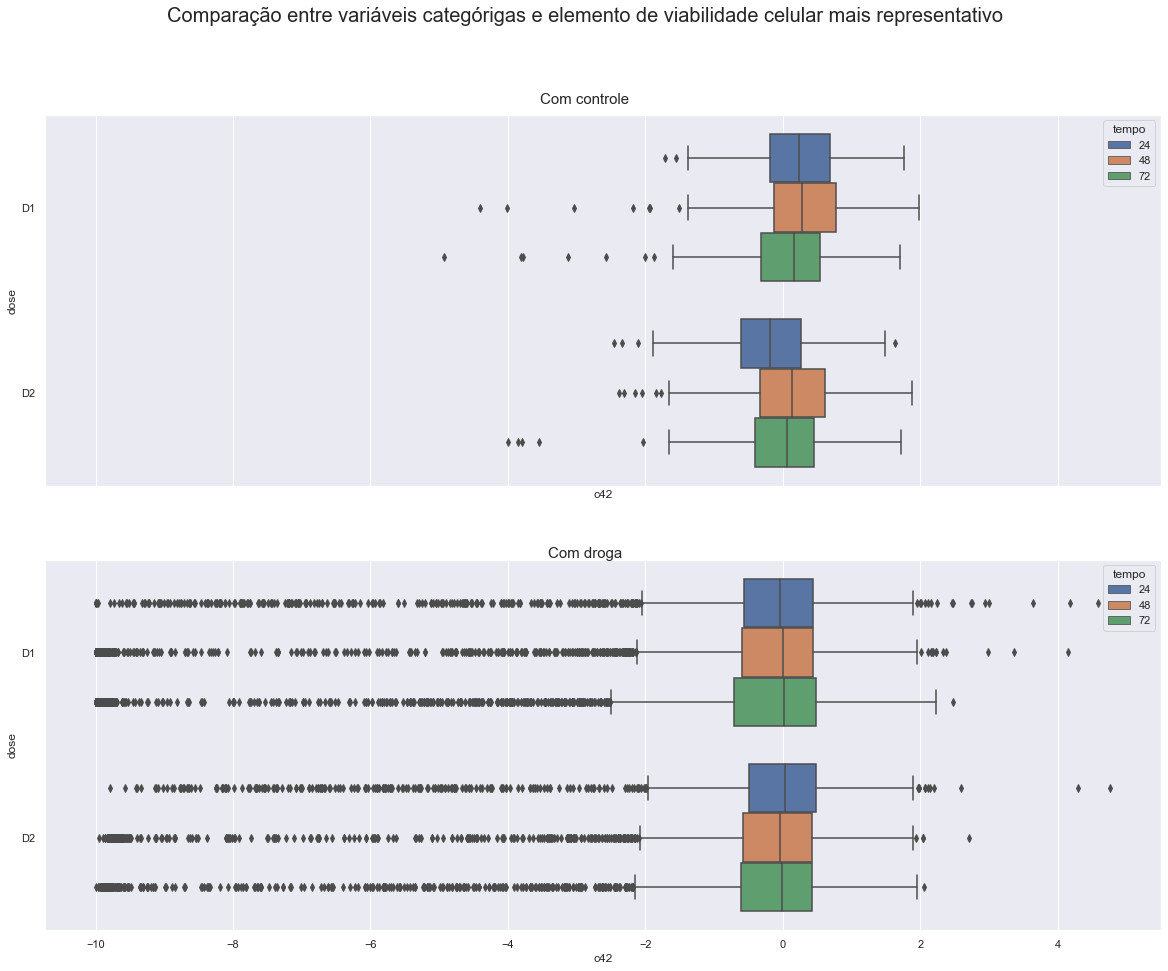

In [ ]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(20,15))
sns.boxplot(data=dados_experimentos.query('tratamento == "com_controle"'), y='dose', hue='tempo', x='c42', ax=ax[0])
sns.boxplot(data=dados_experimentos.query('tratamento == "com_droga"'), y='dose', hue='tempo', x='c42', ax=ax[1])
plt.suptitle('Comparação entre variáveis categórigas e elemento de viabilidade celular mais representativo', fontsize=20)
plt.figtext(.5,.89,'Com controle', fontsize=15, ha='center')
plt.figtext(.5,.47,'Com droga', fontsize=15, ha='center')
plt.show()

Verificamos assim que o grupo controle realmente tem uma amplitude de efeitos muito menor do que os compostos mas não conseguimos inferir nada a partir das variações de dose e tempo. Sigamos então para o dataset de resultados.

In [ ]:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [ ]:
contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

Vamos agora criar duas columas que vão nos ajudar na hora de testarmos nossos algorítimos de machine learn. Um vai nos dizer quantas vezes uma moa foi ativado para aquele experimento e outro vai nos dizer se algum mova foi ativado naquele experimento.

In [ ]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)

In [ ]:
dados_resultados['ativo_moa'] = dados_resultados['n_moa'] != 0

In [ ]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


Depois de criar as novas colunas no dataset de resultados vamos adiciona-los a um novo dataset que será basicamente o dataset de experimentos com essas novas colunas. posteriormente vamos analisar os dados desse novo dataset.

In [ ]:
dados_combinados = pd.merge(dados_experimentos, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [ ]:
#Existe algum experimento do grupo controle que ativa algum moa?
dados_combinados.query('tratamento == "com_controle"' )['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

In [ ]:
#Todos os experimento do grupo com droga ativam algum moa?
dados_combinados.query('tratamento == "com_droga"' )['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

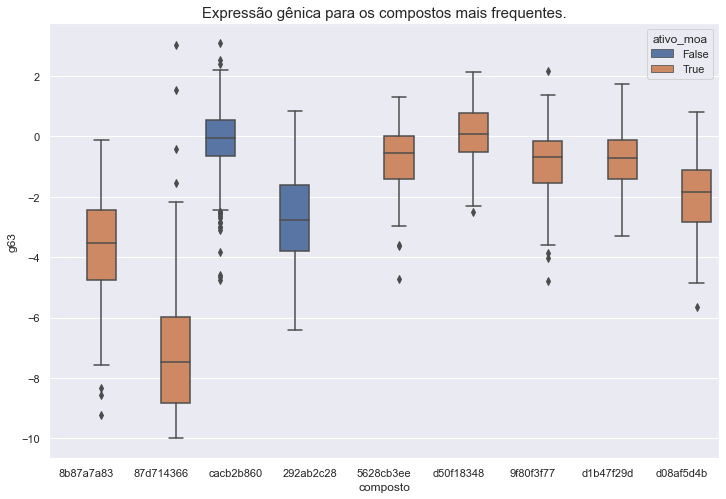

In [ ]:
#Como é a ativação dos compostos de maior frequencia mais o controle em relação a expressão gênica?
compostos_principais = dados_combinados['composto'].value_counts().index[:9]
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_combinados.query('composto in @compostos_principais'), y= 'g63', x='composto', hue='ativo_moa')
plt.title('Expressão gênica para os compostos mais frequentes.', fontsize=15)
plt.show()

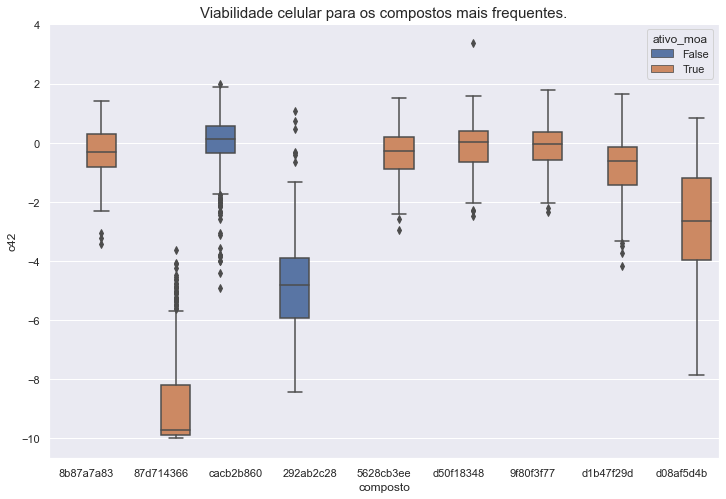

In [ ]:
#E em relação a viabilidade celular, como fica esse gráfico dos compostos mais frequentes?
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_combinados.query('composto in @compostos_principais'), y= 'c42', x='composto', hue='ativo_moa')
plt.title('Viabilidade celular para os compostos mais frequentes.', fontsize=15)
plt.show()

Aqui podemos verificar que para as expressões gênicas, mesmo um composto não ativando um moa ele pode reduzir a expressão gênica. Além disso o sexto composto, mesmo ativando um moa, teve uma expressão celular semelhante ao controle. Por outro lado, praticamente todas as viabilidade celulares ficarm abaixo do controle, houve um composto que mesmo não ativando nenhum moa ainda gerou uma considerável redução de viabilidade celular e três compostos, mesmo ativando algum moa, tiveram uma viabilidade celular parecida com o controle.

Vamos agora verificar quais os tipos de moa existem nessa pesquisa e quais são os mais frequentes.

In [ ]:
tipos_moa = pd.Series()
for i in contagem_moa.index:
  _ = pd.Series(i.split('_')[-1])
  tipos_moa = tipos_moa.append(_, ignore_index=True)

<ipython-input-105-792cfa46745d>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tipos_moa = pd.Series()


In [ ]:
tipos_moa.value_counts()

inhibitor            112
antagonist            32
agonist               28
activator              5
agent                  3
blocker                2
anticonvulsant         1
antibiotic             1
laxative               1
antiprotozoal          1
steroid                1
sensitizer             1
antimalarial           1
b                      1
antifolate             1
anti-inflammatory      1
analgesic              1
antiarrhythmic         1
scavenger              1
medium                 1
antihistamine          1
antifungal             1
secretagogue           1
diuretic               1
antioxidant            1
donor                  1
local                  1
stimulant              1
immunosuppressant      1
antiviral              1
dtype: int64

In [ ]:
contagem_moa_tipo= pd.DataFrame(data={'moa': contagem_moa.index, 'tipo': tipos_moa.values, 'valores': contagem_moa.values})

In [ ]:
contagem_moa_tipo

,moa,tipo,valores
0,nfkb_inhibitor,inhibitor,832
1,proteasome_inhibitor,inhibitor,726
2,cyclooxygenase_inhibitor,inhibitor,435
3,dopamine_receptor_antagonist,antagonist,424
4,serotonin_receptor_antagonist,antagonist,404
...,...,...,...
201,protein_phosphatase_inhibitor,inhibitor,6
202,autotaxin_inhibitor,inhibitor,6
203,diuretic,diuretic,6
204,erbb2_inhibitor,inhibitor,1


In [ ]:
contagem_moa_tipo.groupby('tipo')['valores'].sum().sort_values(ascending=False)

tipo
inhibitor            9693
antagonist           3449
agonist              2330
blocker               323
agent                 150
activator             115
local                  80
immunosuppressant      73
anti-inflammatory      73
antioxidant            73
medium                 56
sensitizer             51
stimulant              49
antibiotic             43
antiprotozoal          36
antifolate             36
secretagogue           30
donor                  26
b                      26
antiviral              23
antimalarial           18
scavenger              18
antifungal             13
antihistamine          12
analgesic              12
anticonvulsant         12
antiarrhythmic          6
diuretic                6
laxative                6
steroid                 6
Name: valores, dtype: int64

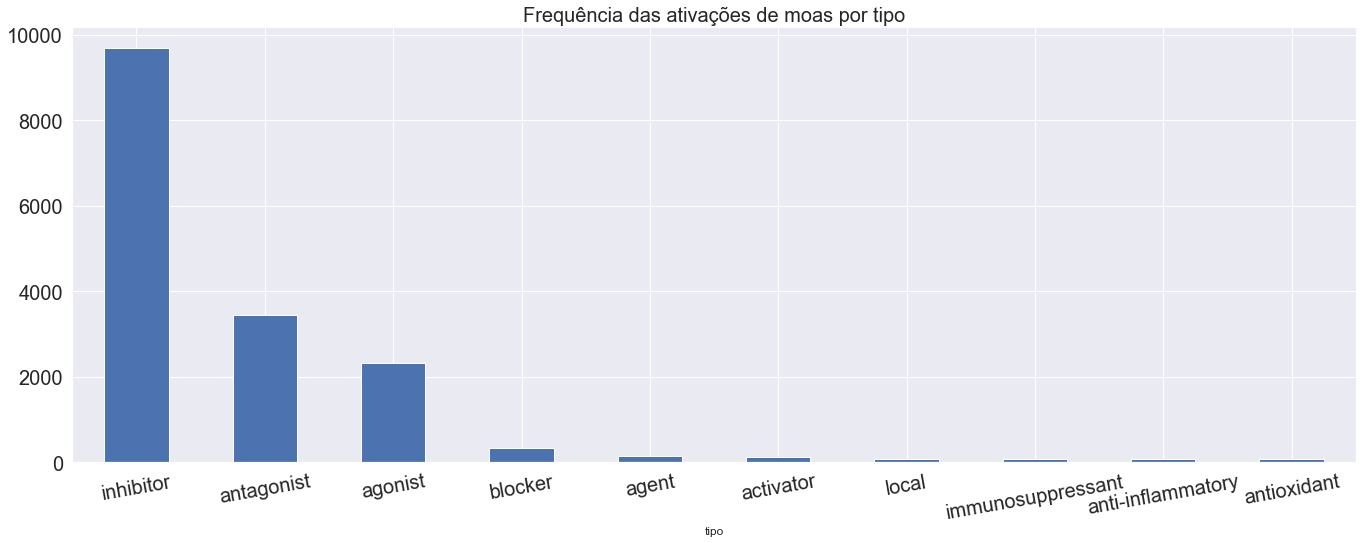

In [ ]:
plt.figure(figsize=(23,8))
contagem_moa_tipo.groupby('tipo')['valores'].sum().sort_values(ascending=False)[:10].plot.bar()
plt.title('Frequência das ativações de moas por tipo', fontsize=20)
plt.xticks(rotation=10)
plt.tick_params(labelsize=20)
plt.show()

Claramente os moas do tipo inhibitor, antagonist e agonist são os mais ativados. Vejamos agora se alguma droga ativa um moa diferente conforme a configuração de tempo ou dose.

A ideia para essa verificação é usar o drop_duplicates que apaga todas as cópias de algum composto que varie a ativação de moa, seja por qualquer motivo. Se sobrar alguma experiência investigaremos qual é a variação. Para tanto, vamos seguir as seguintes etapas:
* Adicionar a coluna composto no dataset de resultados;
* Verificar se há compostos que façam parte de somente um experimento. Havendo vamos criar um novo dataset sem essas experiências, afinal se ela só ocorre uma vêz então não tem como haver variação e essas experiências atrapalham o uso do drop_duplicates.
* Por fim vamos usar excluir a coluna id e fazer o drop_duplicates com a opção de não manter nenhuma instância de uma linha que tenha cópia.

In [ ]:
dados_resultados['composto'] = dados_experimentos['composto']

In [ ]:
ativacao_variaveis = dados_resultados[dados_resultados['ativo_moa']]

In [ ]:
composto_1_exp = ativacao_variaveis['composto'].value_counts() == 1
composto_1_exp = composto_1_exp.reset_index()
composto_1_exp

,index,composto
0,87d714366,False
1,9f80f3f77,False
2,8b87a7a83,False
3,5628cb3ee,False
4,d08af5d4b,False
...,...,...
2071,81a463c0a,True
2072,ed64cad3a,True
2073,cf21e6ee0,True
2074,f19d8c43b,True


In [ ]:
composto_1_exp = composto_1_exp.loc[composto_1_exp['composto'] == True]['index']
composto_1_exp = composto_1_exp.to_list()

In [ ]:
ativacao_variaveis = dados_resultados.query('composto not in @composto_1_exp & ativo_moa == True')
ativacao_variaveis

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa,composto
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,True,b68db1d53
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,True,18bb41b2c
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,True,7cbed3131
5,id_001762a82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,True,e06749542
7,id_0020d0484,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,True,8b87a7a83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23807,id_fff7e6992,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,True,a28556d51
23808,id_fff8c2444,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,True,6c3a459be
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,True,df1d0a5a1
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,True,ecf3b6b74


In [ ]:
ativacao_variaveis.iloc[:,1:].drop_duplicates(keep=False)

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa,composto


Verificamos então que cada composto não varia as ativações de moa. 

Constatamos que não há nenhum composto que ative um moa diferente. Vamos agora verificar se conseguimos prever a ativação de moas usando algorítimos de machine learn. Primeiro vamos importar as bibliotecas e depois fazer a divisão do dataset em treino e teste.

In [ ]:
#Bibliotecas machine learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

In [ ]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=seed)

In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
previsao_logistRegre = modelo_rlogistica.predict(x_teste)
report = classification_report(y_teste, previsao_logistRegre)
print(report)

              precision    recall  f1-score   support

       False       0.53      0.40      0.46      1873
        True       0.67      0.77      0.72      2890

    accuracy                           0.63      4763
   macro avg       0.60      0.59      0.59      4763
weighted avg       0.61      0.63      0.61      4763



Começamos mal, acuracia baixa, precisão baixa e recall baixo. Mas vamos ver se pelo menos estamos melhor em relação a um modelo burro nos estamos.

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
report = classification_report(y_teste, previsao_dummy)
print(report)

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1873
        True       0.61      1.00      0.76      2890

    accuracy                           0.61      4763
   macro avg       0.30      0.50      0.38      4763
weighted avg       0.37      0.61      0.46      4763



C:\Users\Marcelo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass strategy=most_frequent as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Marcelo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Até estamos, mas muito pouco. Vamos ver se algum outro algorítimo consegue um resultado bom antes de tentar otimizar os dados.

In [ ]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
previsao_decisiontree = modelo_arvore.predict(x_teste)
report = classification_report(y_teste, previsao_decisiontree)
print(report)

              precision    recall  f1-score   support

       False       0.51      0.21      0.29      1873
        True       0.63      0.87      0.73      2890

    accuracy                           0.61      4763
   macro avg       0.57      0.54      0.51      4763
weighted avg       0.58      0.61      0.56      4763



In [ ]:
modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
previsao_randomforest = modelo_randomforest.predict(x_teste)
report = classification_report(y_teste, previsao_randomforest)
print(report)

              precision    recall  f1-score   support

       False       0.61      0.26      0.37      1873
        True       0.65      0.89      0.75      2890

    accuracy                           0.64      4763
   macro avg       0.63      0.58      0.56      4763
weighted avg       0.63      0.64      0.60      4763



Não foi muito bem. Vamos testar outras hipoteses então.Vamos ver se conseguimos prever quais compostos causam maior baixa de viabilidade celular.

In [ ]:
for c in comp_relev_baixa_viab_cel:
    dados_combinados[c] = (dados_combinados['composto'] == c)*1

In [ ]:
dados_combinados['baixa_via_cel'] = dados_combinados['87d714366'] + dados_combinados['292ab2c28'] + dados_combinados['d08af5d4b']

In [ ]:
del dados_combinados['87d714366']
del dados_combinados['292ab2c28']
del dados_combinados['d08af5d4b']

In [ ]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['baixa_via_cel']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
report = classification_report(y_teste, previsao_dummy)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4541
           1       0.00      0.00      0.00       222

    accuracy                           0.95      4763
   macro avg       0.48      0.50      0.49      4763
weighted avg       0.91      0.95      0.93      4763



C:\Users\Marcelo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass strategy=most_frequent as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Marcelo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
previsao_logistRegre = modelo_rlogistica.predict(x_teste)
report = classification_report(y_teste, previsao_logistRegre)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4541
           1       0.96      0.93      0.94       222

    accuracy                           0.99      4763
   macro avg       0.98      0.96      0.97      4763
weighted avg       0.99      0.99      0.99      4763



In [ ]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
previsao_decisiontree = modelo_arvore.predict(x_teste)
report = classification_report(y_teste, previsao_decisiontree)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4542
           1       0.96      0.97      0.97      4541

    accuracy                           0.97      9083
   macro avg       0.97      0.97      0.97      9083
weighted avg       0.97      0.97      0.97      9083



In [ ]:
modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
previsao_randomforest = modelo_randomforest.predict(x_teste)
report = classification_report(y_teste, previsao_randomforest)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4542
           1       1.00      1.00      1.00      4541

    accuracy                           1.00      9083
   macro avg       1.00      1.00      1.00      9083
weighted avg       1.00      1.00      1.00      9083



Tivemos excelentes resultados, contudo, o número de experimentos está muito desbalanceado, afinal a quantidade de experimentos que implicam em baixa viabilidade celular é de apenas 4,65% dos experimentos. Disso podemos inferir que essa predição não parece realmente boa. Se o método burro acertou 95% das vezes algo provavelmente não está certo. Vamos seguir com outras hipoteses, será que conseguimos prever quanto tempos ativação de mais de 1 moa?

In [ ]:
dados_combinados['2+'] = dados_combinados['n_moa'] >= 2

In [ ]:
dados_combinados

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa,baixa_via_cel,2+
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True,0,False
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True,0,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680,1,True,0,False
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689,1,True,0,False
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808,0,False,0,False
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740,1,True,0,False


In [ ]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['2+']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=seed)

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
report = classification_report(y_teste, previsao_dummy)
print(report)

              precision    recall  f1-score   support

       False       0.92      1.00      0.96      4380
        True       0.00      0.00      0.00       383

    accuracy                           0.92      4763
   macro avg       0.46      0.50      0.48      4763
weighted avg       0.85      0.92      0.88      4763



C:\Users\Marcelo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass strategy=most_frequent as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Marcelo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
previsao_logistRegre = modelo_rlogistica.predict(x_teste)
report = classification_report(y_teste, previsao_logistRegre)
print(report)

              precision    recall  f1-score   support

       False       0.96      0.99      0.97      4380
        True       0.83      0.48      0.61       383

    accuracy                           0.95      4763
   macro avg       0.89      0.74      0.79      4763
weighted avg       0.95      0.95      0.94      4763



In [ ]:
modelo_arvore = DecisionTreeClassifier(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
previsao_decisiontree = modelo_arvore.predict(x_teste)
report = classification_report(y_teste, previsao_decisiontree)
print(report)

              precision    recall  f1-score   support

       False       0.96      0.99      0.97      4380
        True       0.82      0.50      0.62       383

    accuracy                           0.95      4763
   macro avg       0.89      0.75      0.80      4763
weighted avg       0.95      0.95      0.95      4763



In [ ]:
modelo_randomforest = RandomForestClassifier()
modelo_randomforest.fit(x_treino, y_treino)
previsao_randomforest = modelo_randomforest.predict(x_teste)
report = classification_report(y_teste, previsao_randomforest)
print(report)

              precision    recall  f1-score   support

       False       0.95      1.00      0.98      4380
        True       0.99      0.42      0.59       383

    accuracy                           0.95      4763
   macro avg       0.97      0.71      0.78      4763
weighted avg       0.95      0.95      0.94      4763



Novamente o dummy nos chama a atenção. Provavelmente essa predição se baseia também em uma comparação muito desbalanceada. Vamos fazer um upsample para ver se ainda continuamos com uma boa acuracia.  

In [ ]:
classe_menor = dados_combinados[dados_combinados['baixa_via_cel'] == 1]
classe_maior = dados_combinados[dados_combinados['baixa_via_cel'] == 0]

In [ ]:
classe_menor.shape

(1108, 880)

In [ ]:
classe_maior.shape

(22706, 880)

In [ ]:
from sklearn.utils import resample

In [ ]:
classe_menor_upsample = resample(classe_menor, replace=True, n_samples = 22706, random_state = seed )

In [ ]:
classe_menor_upsample.shape

(22706, 880)

In [ ]:
dados_resample = pd.concat([classe_maior, classe_menor_upsample])

In [ ]:
dados_resample['baixa_via_cel'].value_counts()

1    22706
0    22706
Name: baixa_via_cel, dtype: int64

In [ ]:
x = dados_resample.select_dtypes('float64')
y = dados_resample['baixa_via_cel']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
report = classification_report(y_teste, previsao_dummy)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4542
           1       0.50      1.00      0.67      4541

    accuracy                           0.50      9083
   macro avg       0.25      0.50      0.33      9083
weighted avg       0.25      0.50      0.33      9083



C:\Users\Marcelo\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass strategy=most_frequent as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Marcelo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
modelo_rlogistica = LogisticRegression(max_iter=1000)
modelo_rlogistica.fit(x_treino, y_treino)
previsao_logistRegre = modelo_rlogistica.predict(x_teste)
report = classification_report(y_teste, previsao_logistRegre)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4542
           1       1.00      1.00      1.00      4541

    accuracy                           1.00      9083
   macro avg       1.00      1.00      1.00      9083
weighted avg       1.00      1.00      1.00      9083

